selective search 설치

> !pip install selectivesearch

In [18]:
!pip install selectivesearch

img shape :  (450, 375, 3)


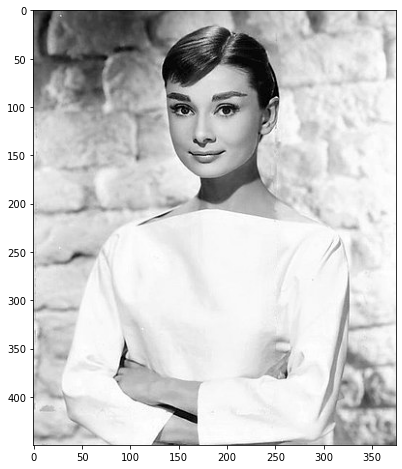

In [19]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('image/audrey.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape : ', img.shape)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [20]:
import selectivesearch

'''
selectivesearch.selective_search()는 이미지의 region proposal 정보를 반환
scale value가 크면, 큰 object 위주로 알고리즘 진행
min_size : 추천하는 image size의 최소크기
regions : selectivesearch에서 추천해주는 object가 있을만한 공간
scale value, min_size의 값이 크면 regions에서 추천해주는 양이 줄어듬
'''
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))
# len(retions) -> 41 : selectivesearch 기반으로 찾아낸 object가 있을만한 공간의 수

<class 'list'> 41


##### 반환된 region proposal (g후보 영역)에 대한 정보 보기

반환된 region 변수는 리스트 타칩으로 세부 원소로 딕셔너리를 가지고 있음. 개별 딕셔너리내 key값별 의미

* rect 키값은 x, y 시작 좌표와 너비, 높이 값을 가지며 이 값이 detected object 후보를 나타내는 bounding box임.

* size는 object의 크기

* labels는 해당 rect로 지정된 bounding box내에 있는 object들의 고유 ID

* 아래로 내려갈수록 너비와 높이 값이 큰 bounding box이며 하나의 bounding box에 여러개의 object가 있을 확률이 커짐.

* labels가 두 개 이상 동시에 출력되는 경우 : 유사한  label끼리 합쳐짐

In [21]:
regions

[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]},
 {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]},
 {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]},
 {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]},
 {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]},
 {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]},
 {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]},
 {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]},
 {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]},
 {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]},
 {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]},
 {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]},
 {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]},
 {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]},
 {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]},
 {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]},


In [22]:
# rect정보만 출력해서 확인
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


##### Bounding Box 시각화

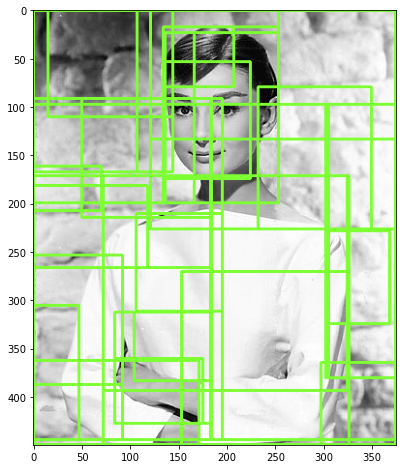

In [23]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box의 색깔, 두께 등을 인자로 입력하면 원본 이미지에 box를 그려줌
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb_copy)
plt.show()

##### Bounding Box의 크기가 큰 후보만 추출

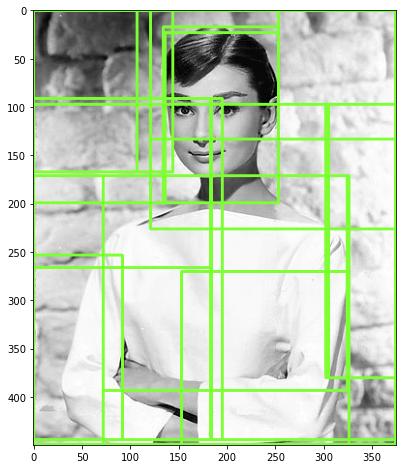

In [24]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb_copy)
plt.show()

##### IOU 구하기

입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [25]:
import numpy as np

def compute_iou(cand_box, gt_box):

    # calculate intersection areas
    # cand_box : 예측한 bounding box (selective search에서 추천해준 box), gt_box : ground truth bounding box
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.maximum(cand_box[2], gt_box[2])
    y2 = np.maximum(cand_box[3], gt_box[3])

    intersection = np.maximum(x2 -x1, 0) * np.maximum(y2 -y1, 0)

    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection

    iou = intersection / union
    return iou

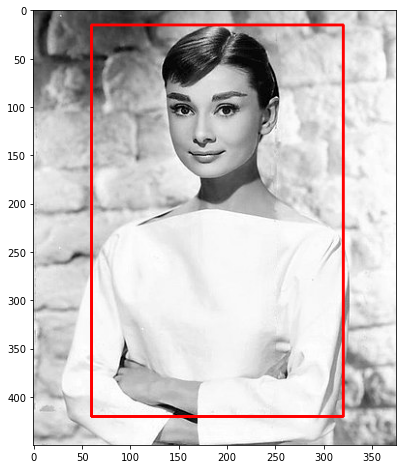

In [26]:
import cv2
import matplotlib.pyplot as plt

# 실제 box(ground truth)의 좌표를 아래와 같다고 가정
gt_box = [60, 15, 320, 420]

img = cv2.imread('image/audrey.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [33]:
import selectivesearch

img = cv2.imread('image/audrey.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale = 100, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 41


In [34]:
# 추천해준 object
[cand['rect'] for cand in regions]

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

In [35]:
cand_rects = [cand['rect'] for cand in regions]

for index, cand_box  in enumerate(cand_rects):
    cand_box = list(cand_box) # tuple 형태를 list 형태로 변경

    # (x_min, y_min, w, h) -> (x_min, y_min, w + x_min, h + y_min) -> (x_min, y_min, x_max, y-max)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]


iou = compute_iou(cand_box, gt_box)
print('index: ', index, "iou: ", iou)

index:  40 iou:  0.9950784958013874


In [36]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 107, 167),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 91, 183, 175),
 (0, 91, 183, 175),
 (0, 91, 183, 353),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 97, 374, 352),
 (0, 171, 326, 278),
 (0, 181, 118, 85),
 (0, 253, 92, 134),
 (0, 253, 92, 191),
 (0, 362, 171, 87),
 (15, 0, 129, 110),
 (50, 91, 133, 123),
 (72, 171, 252, 222),
 (72, 171, 254, 278),
 (84, 312, 100, 115),
 (121, 0, 253, 133),
 (121, 0, 253, 226),
 (134, 17, 119, 182),
 (136, 23, 117, 176),
 (153, 270, 173, 179),
 (166, 23, 87, 176),
 (232, 79, 117, 147),
 (297, 364, 77, 85),
 (302, 97, 72, 283),
 (305, 97, 69, 283)]

img shape:  (450, 375, 3)
index: 0 iou: 1.6644736842105263 rectangle" (0, 167, 107, 167)
index: 1 iou: 3.263157894736842 rectangle" (15, 110, 144, 110)
index: 2 iou: 2.2212670929058707 rectangle" (121, 133, 374, 133)
index: 4 iou: 0.8174528642635267 rectangle" (136, 174, 224, 121)
index: 6 iou: 1.3512627090849458 rectangle" (50, 214, 183, 123)
index: 9 iou: 0.9120313425356475 rectangle" (0, 266, 118, 85)
index: 16 iou: 0.8237496656860123 rectangle" (0, 266, 183, 175)
index: 17 iou: 0.6564533053515215 rectangle" (136, 199, 253, 176)
index: 19 iou: 0.6611764327419536 rectangle" (134, 199, 253, 182)
index: 21 iou: 0.8730655661887652 rectangle" (121, 226, 374, 226)
index: 22 iou: 0.8237496656860123 rectangle" (0, 266, 183, 175)
index: 23 iou: 1.6644736842105263 rectangle" (0, 167, 144, 167)
index: 24 iou: 1.201086956521739 rectangle" (0, 199, 253, 199)


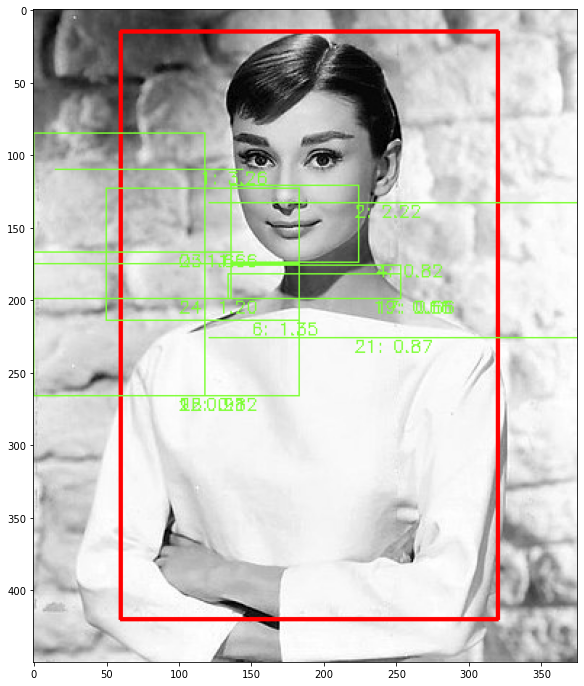

In [37]:
img = cv2.imread('image/audrey.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

for index, cand_box in enumerate(cand_rects):

    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[1] += cand_box[3]
    
    iou = compute_iou(cand_box, gt_box)

    if iou >0.5:
        print('index:', index, "iou:", iou, 'rectangle"', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2],  cand_box[3]), color = green_rgb, thickness = 1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0] + 100, cand_box[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color = green_rgb, thickness = 1)

plt.figure(figsize = (12, 12))
plt.imshow(img_rgb)
plt.show()